In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
%matplotlib inline
plt.style.use('classic')

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train/255
X_test = X_test/255

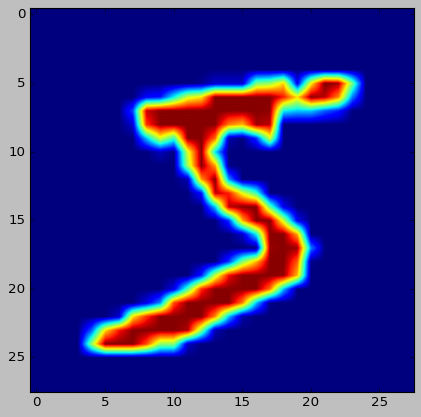

In [ ]:
plt.imshow(X_train[0]);

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
model = keras.Sequential([
                          # cnn
                          keras.layers.Conv2D(filters = 28, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                          keras.layers.MaxPooling2D((2, 2)),
                          
                          # dense
                          keras.layers.Flatten(),
                          keras.layers.Dense(3000, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 28s 10ms/step - loss: 0.1137 - accuracy: 0.9643
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0369 - accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0106 - accuracy: 0.9963


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0514 - accuracy: 0.9875


[0.0513530895113945, 0.987500011920929]

In [ ]:
index = 15
np.argmax(model.predict(X_test)[index]), y_test[index]

(5, 5)